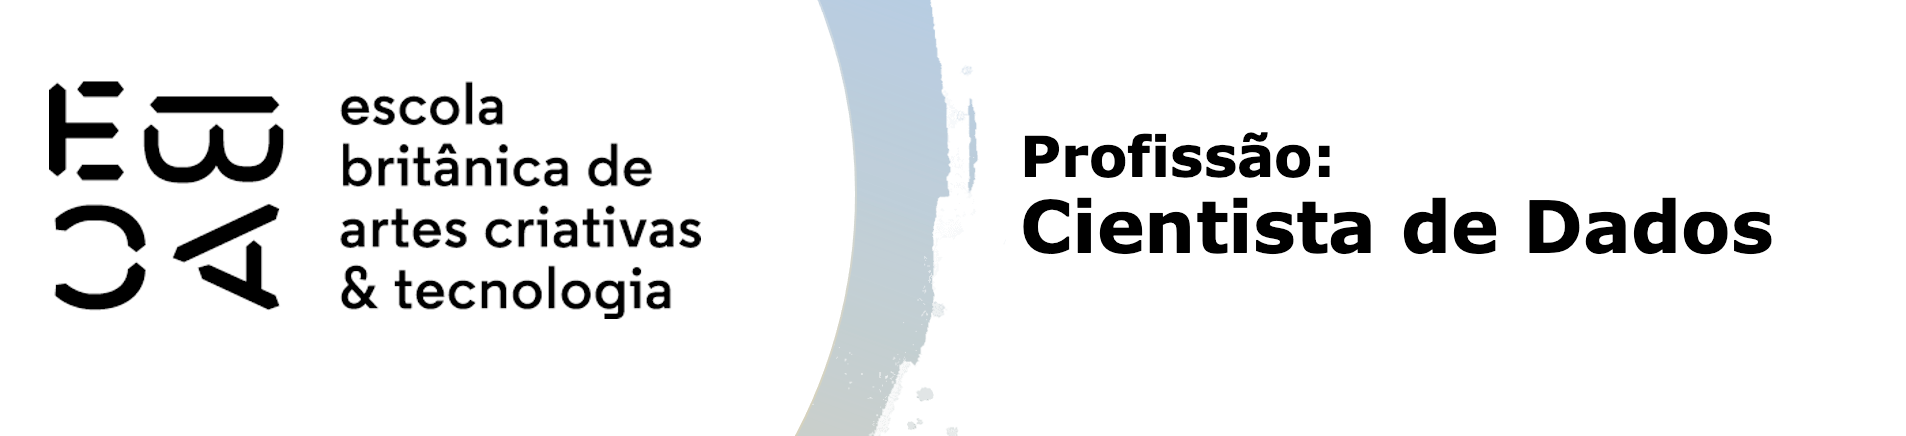

____

### Aluno: Victor Resende

____

# Tarefa II

_______________

Carregue a base ```NFP.ftr```. Essa base é proveniente do projeto #AMABiliDados, e contém dados da nota fiscal paulista cadastrados para doação automática para a AMA, Associação de Amigos do Autista. 

A *Nota Fiscal Paulista* é um programa de incentivo do governo do estado de São Paulo, que retorna um pedacinho do ICMS ao consumidor sempre que solicita o registro do seu CPF na nota. Nesse programa, o contribuinte pode direcionar seus créditos a uma ONG, e quando faz isso, sempre que faz esse consumidor cadastrado faz uma compra, os créditos de notas emitidas pelo mesmo estabelecimento não identificadas (notas sem CPF) são "arrastados" para a ONG na forma de uma doação.

Clique no link, caso queira saber mais sobre a [AMA](https://www.ama.org.br/site/).<br>
Clique no link, caso queira saber como o cidadão pode ser um [doador da NFP](https://doacao1.ama.org.br/sitenfp).

Essa base possui dados das notas cujos contribuintes direcionaram seus créditos à AMA. Seus campos estão descritos abaixo:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

## Carregando as bibliocas necessárias:

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


## Carregando os dados:

In [11]:
df = pd.read_pickle('base_nfp.pkl')
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes


## Análise da probabilidade de retorno

Considere somente os dados de janeiro de 2020 em diante para esta análise.

- Analise a proporção de notas que tiveram retorno>0 por categoria de estabelecimento. Esta análise pode ser por tabela ou gráfico.

C:\Users\User\AppData\Local\Temp\ipykernel_9128\3093814273.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Retorno_Flag'] = df_filtered['Retorno'] > 0


      Categoria  Proporção Retorno > 0
0  Restaurantes               0.746214
1     Alimentos               0.681584
2       Mercado               0.478155
3    Construção               0.468810
4  não definido               0.363394
5      Farmácia               0.351556
6    Auto posto               0.250000
7     Vestuário               0.230729
8        Varejo               0.138373


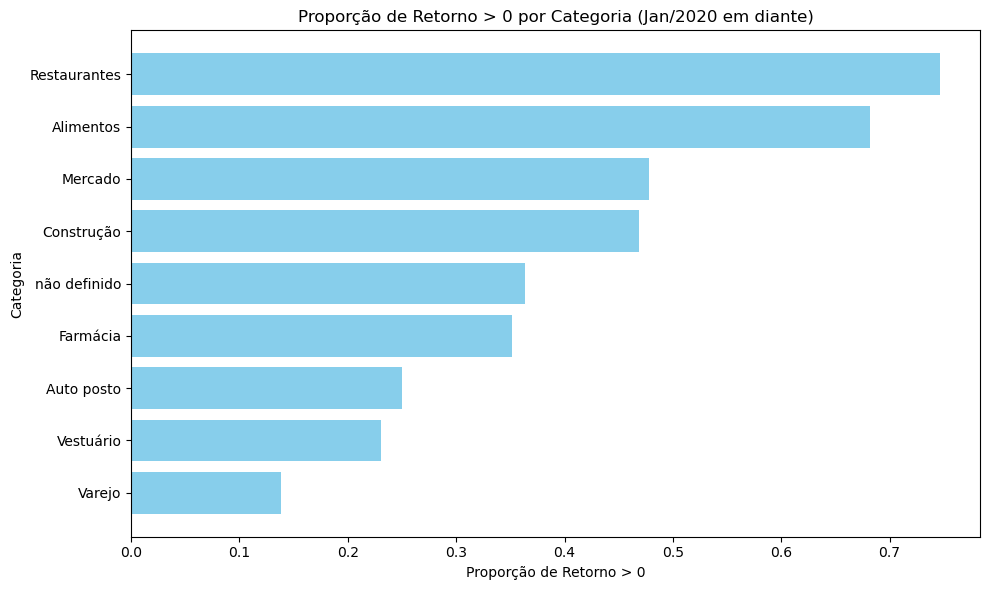

In [51]:
# Convertendo a coluna de datas para o formato datetime:
df['Data Emissão'] = pd.to_datetime(df['Data Emissão'])

# Filtrando os dados para janeiro de 2020 em diante:
df_filtered = df[df['Data Emissão'] >= '2020-01-01']

# Criando a coluna flag para indicar se o retorno foi maior que 0:
df_filtered['Retorno_Flag'] = df_filtered['Retorno'] > 0

# Calculando a proporção de retorno por categoria:
proportion_by_category = df_filtered.groupby('categoria')['Retorno_Flag'].mean().sort_values(ascending=False)

# Convertendo para DataFrame para exibição tabular:
proportion_table = proportion_by_category.reset_index()
proportion_table.columns = ['Categoria', 'Proporção Retorno > 0']

# Exibindo a tabela:
print(proportion_table)

# Plotando o gráfico:
plt.figure(figsize=(10, 6))
plt.barh(proportion_by_category.index, proportion_by_category.values, color='skyblue')
plt.xlabel('Proporção de Retorno > 0')
plt.ylabel('Categoria')
plt.title('Proporção de Retorno > 0 por Categoria (Jan/2020 em diante)')
plt.gca().invert_yaxis()  # Inverter eixo Y para ordenar do maior para o menor
plt.tight_layout()
plt.show()


## Cálculo do WOE

- Calcule o WOE das categorias, sendo que o evento em questão é a nota ter retorno>0.
- Analise este WOE por tabela e por gráfico.

      categoria   good    bad  good_dist  bad_dist       WOE
0  Restaurantes   1626    553   0.043571  0.011141  1.363801
1     Alimentos   3442   1608   0.092234  0.032395  1.046342
2       Mercado  13177  14381   0.353100  0.289718  0.197846
3    Construção   7523   8524   0.201592  0.171723  0.160360
4  não definido   6689  11718   0.179243  0.236069 -0.275381
5      Farmácia   3582   6607   0.095986  0.133104 -0.326928
6    Auto posto    135    405   0.003618  0.008159 -0.813331
7     Vestuário    443   1477   0.011871  0.029755 -0.918918
8        Varejo    701   4365   0.018785  0.087937 -1.543585


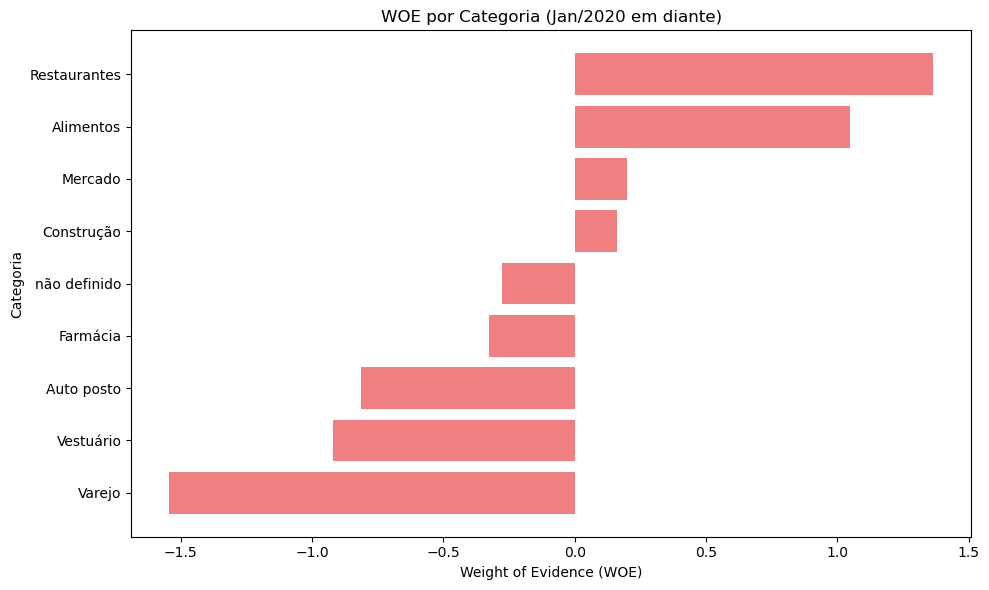

In [53]:
# Calculando os totais gerais:
total_good = df_filtered['Retorno_Flag'].sum()
total_bad = (~df_filtered['Retorno_Flag']).sum()

# Agrupando por categoria e calculando os totais por categoria:
category_stats = df_filtered.groupby('categoria')['Retorno_Flag'].agg(['sum', 'count'])
category_stats['good'] = category_stats['sum']  # Total de retornos > 0
category_stats['bad'] = category_stats['count'] - category_stats['good']  # Total de retornos == 0

# Calculando proporções para WOE:
category_stats['good_dist'] = category_stats['good'] / total_good
category_stats['bad_dist'] = category_stats['bad'] / total_bad
category_stats['WOE'] = np.log(category_stats['good_dist'] / category_stats['bad_dist'])

# Ordenando por WOE:
category_stats = category_stats.sort_values(by='WOE', ascending=False)

# Exibindo a tabela relevante:
woe_table = category_stats[['good', 'bad', 'good_dist', 'bad_dist', 'WOE']].reset_index()
print(woe_table)

# Plotando o gráfico de WOE:
plt.figure(figsize=(10, 6))
plt.barh(category_stats.index, category_stats['WOE'], color='lightcoral')
plt.xlabel('Weight of Evidence (WOE)')
plt.ylabel('Categoria')
plt.title('WOE por Categoria (Jan/2020 em diante)')
plt.gca().invert_yaxis()  # Inverter eixo Y para ordenar do maior para o menor
plt.tight_layout()
plt.show()


## Cálculo do *Information Value*

Calcule o *IV* dessa variável.

In [55]:
# Calculando o IV:
category_stats['IV'] = (category_stats['good_dist'] - category_stats['bad_dist']) * category_stats['WOE']

# Somando os valores de IV por categoria:
information_value = category_stats['IV'].sum()

print(f"Information Value (IV) da variável 'categoria': {information_value:.4f}")

# Interpretação do IV:
if information_value < 0.02:
    print("A variável tem relevância irrelevante para discriminação.")
elif information_value < 0.1:
    print("A variável tem força preditiva fraca.")
elif information_value < 0.3:
    print("A variável tem força preditiva média.")
elif information_value < 0.5:
    print("A variável tem força preditiva forte.")
else:
    print("A variável tem força preditiva suspeita. Pode haver overfitting.")


Information Value (IV) da variável 'categoria': 0.2788
A variável tem força preditiva média.


___________

## <font color='red'> Conclusões parciais

- **Observamos várias atividades com NF com retorno positivo como: <font color='blue'> restaurantes, alimentos, mercado, construção, farmácia, autoposto e vestuário.**
- **Quando aplicamos o WOE filtramos ainda mais nossos dados e verificamos as atividades mais propensas a terem NF com retorno positivo como: <font color='green'>restaurantes, alimentos, mercado e construção.**
- **Sugerimos, então, contar com essas atividades, bem como incentivar outras atividades comerciais a adotar o projeto #AMABiliDados.**

____________

## Criando variáveis

**Variáveis temporais**: É possível que haja alguma regra de liberação de créditos de acordo com o dia do mês, o dia da semana, fim de semana (sim ou não), ou até alterações temporais da regra. Vamos criar as seguintes variáveis para testar estas hipóteses:

- Dia da semana
- Dummy para fim de semana
- Dia do mês
- Mês (já na base)
- Trimestre
- Ano (já na base)

**Valor da nota**: Vamos criar também algumas variáveis para resumir o valor da nota, e posteriormente criar uma intuição sobre categorizações de variáveis contínuas.

- Crie categorizações da variável ```Valor NF```, por quantís, em 5, 10, 20 e 50 categorias.

In [57]:
# Convertendo a coluna 'Data Emissão' para o tipo datetime:
df['Data Emissão'] = pd.to_datetime(df['Data Emissão'])

# 1. Variáveis Temporais:
df['Dia da Semana'] = df['Data Emissão'].dt.dayofweek  # Segunda-feira=0, Domingo=6
df['Fim de Semana'] = df['Dia da Semana'].isin([5, 6]).astype(int)  # 1 se for fim de semana, 0 caso contrário
df['Dia do Mês'] = df['Data Emissão'].dt.day
df['Mês'] = df['Data Emissão'].dt.month
df['Trimestre'] = df['Data Emissão'].dt.quarter
df['Ano'] = df['Data Emissão'].dt.year

# 2. Categorizações da variável 'Valor NF':
# Categorização por quantis:
quantiles_5 = df['Valor NF'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]).values
df['Valor NF - 5 categorias'] = pd.cut(df['Valor NF'], bins=quantiles_5, labels=[1, 2, 3, 4, 5], include_lowest=True)

quantiles_10 = df['Valor NF'].quantile([i/10 for i in range(11)]).values
df['Valor NF - 10 categorias'] = pd.cut(df['Valor NF'], bins=quantiles_10, labels=[i+1 for i in range(10)], include_lowest=True)

quantiles_20 = df['Valor NF'].quantile([i/20 for i in range(21)]).values
df['Valor NF - 20 categorias'] = pd.cut(df['Valor NF'], bins=quantiles_20, labels=[i+1 for i in range(20)], include_lowest=True)

quantiles_50 = df['Valor NF'].quantile([i/50 for i in range(51)]).values
df['Valor NF - 50 categorias'] = pd.cut(df['Valor NF'], bins=quantiles_50, labels=[i+1 for i in range(50)], include_lowest=True)

# Visualizando as primeiras linhas para conferir as novas variáveis:
df.head()


,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,...,Dia da Semana,Fim de Semana,Dia do Mês,Mês,Trimestre,Valor NF - 5 categorias,Valor NF - 10 categorias,Valor NF - 20 categorias,Valor NF - 50 categorias,target
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,...,4,0,30,6,2,2,4,8,18,0
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,...,4,0,30,6,2,3,6,12,29,0
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,...,4,0,30,6,2,2,4,8,20,1
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,...,4,0,30,6,2,4,8,16,39,1
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,...,4,0,30,6,2,4,8,16,40,1


## Calcule o IV de todas essas variáveis

Sugestão: Construa um metadados e tente utilizar uma função como a que foi utilizada durante a aula. Você vai conseguir fazer esse cálculo para as variáveis uma a uma, mas em casos reais em que vamos mais além na criação de variáveis, podemos ter centenas, ou até milhares de variáveis, esses cálculos *precisam* ser automáticos nesses casos.

In [59]:
# Função para calcular o WOE e IV de uma variável:
def calc_woe_iv(df, feature, target):
    # Criação da tabela de contingência
    df_woe = pd.crosstab(df[feature], df[target])
    
    # Caso haja mais de duas colunas, vamos focar apenas na primeira e segunda coluna (que correspondem ao 'good' e 'bad')
    if df_woe.shape[1] > 1:
        df_woe = df_woe[[1, 0]]  # Considerar as classes 1 e 0 como 'good' e 'bad'
    else:
        df_woe[1] = df_woe[1]  # Caso tenha apenas uma coluna, ajustamos a contagem da classe '1'
        df_woe[0] = 0  # Adicionando a classe '0' com 0

    df_woe['total'] = df_woe.sum(axis=1)
    df_woe['dist_total'] = df_woe['total'] / df_woe['total'].sum()  # Proporção total
    df_woe['dist_good'] = df_woe[1] / df_woe[1].sum()  # Proporção da classe 'good' (1)
    df_woe['dist_bad'] = df_woe[0] / df_woe[0].sum()  # Proporção da classe 'bad' (0)
    
    # Calculando o WOE e o IV:
    df_woe['woe'] = np.log(df_woe['dist_good'] / df_woe['dist_bad'])
    df_woe['iv'] = (df_woe['dist_good'] - df_woe['dist_bad']) * df_woe['woe']
    
    # Cálculo do IV total:
    iv = df_woe['iv'].sum()
    return iv

# Metadados: lista de variáveis criadas:
metadata = {
    'Dia da Semana': 'categorical',
    'Fim de Semana': 'binary',
    'Dia do Mês': 'numeric',
    'Mês': 'numeric',
    'Trimestre': 'numeric',
    'Ano': 'numeric',
    'Valor NF - 5 categorias': 'categorical',
    'Valor NF - 10 categorias': 'categorical',
    'Valor NF - 20 categorias': 'categorical',
    'Valor NF - 50 categorias': 'categorical'
}

# Definindo a variável alvo (target) - neste caso, vamos assumir que é 'Retorno > 0':
df['target'] = (df['Retorno'] > 0).astype(int)  # 1 para retorno > 0, 0 caso contrário

# Calculando o IV para todas as variáveis:
iv_results = {}

for feature, var_type in metadata.items():
    if var_type == 'categorical' or var_type == 'binary':  # Variáveis categóricas ou binárias
        iv_results[feature] = calc_woe_iv(df, feature, 'target')

# Exibindo os resultados de IV:
iv_results_df = pd.DataFrame(list(iv_results.items()), columns=['Feature', 'IV'])
iv_results_df = iv_results_df.sort_values(by='IV', ascending=False)
iv_results_df


,Feature,IV
5,Valor NF - 50 categorias,0.152315
4,Valor NF - 20 categorias,0.124525
3,Valor NF - 10 categorias,0.106650
2,Valor NF - 5 categorias,0.056695
0,Dia da Semana,0.006883
1,Fim de Semana,0.004346


___________

## Descritiva simples no tempo

Para compor a análise que virá a seguir, faça uma análise descritiva básica no tempo - utilize trimestre como agregação (ou uma média móvel por trimestre, como preferir) e avalie graficamente:

- A quantidade de notas registradas na base por período
- A quantidade de notas por categoria e por período
- A proporção de notas com crédito por categoria por período

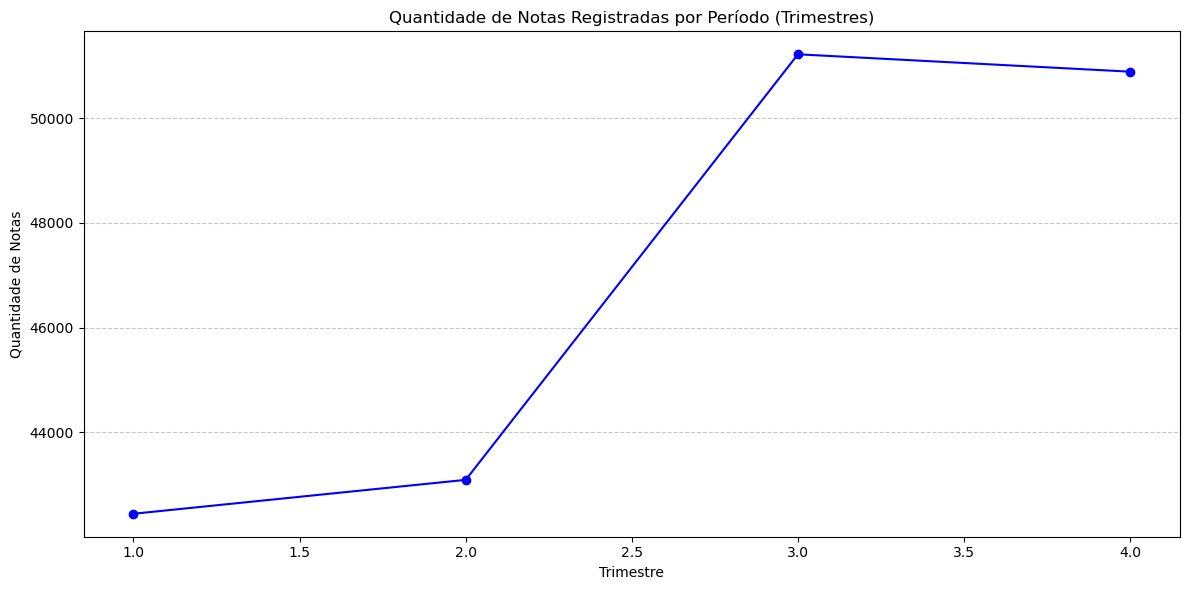

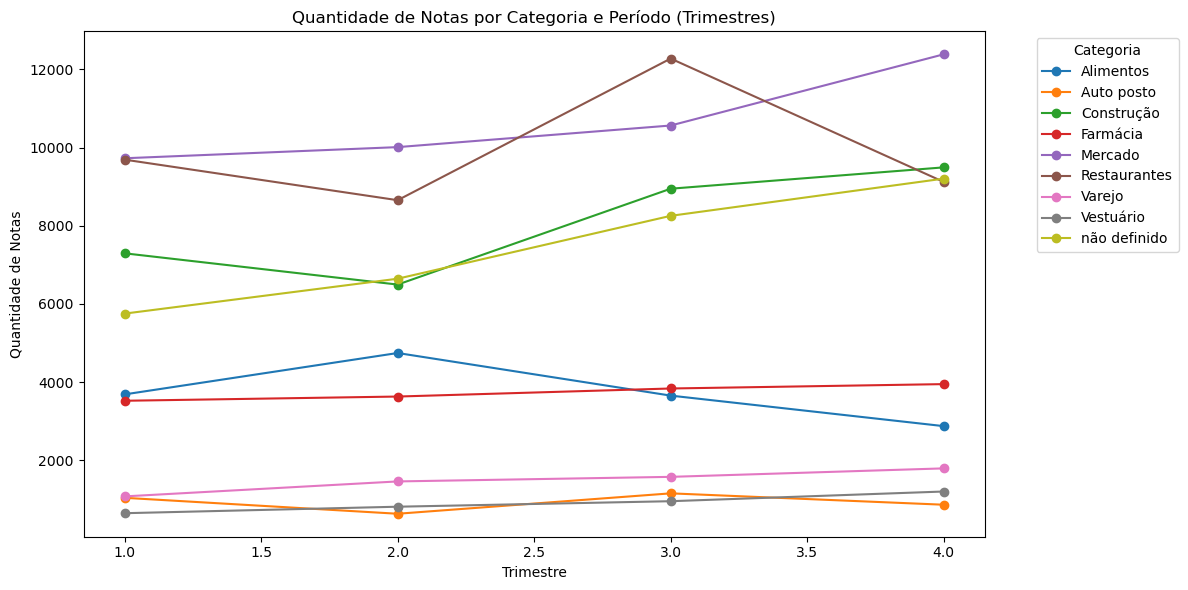

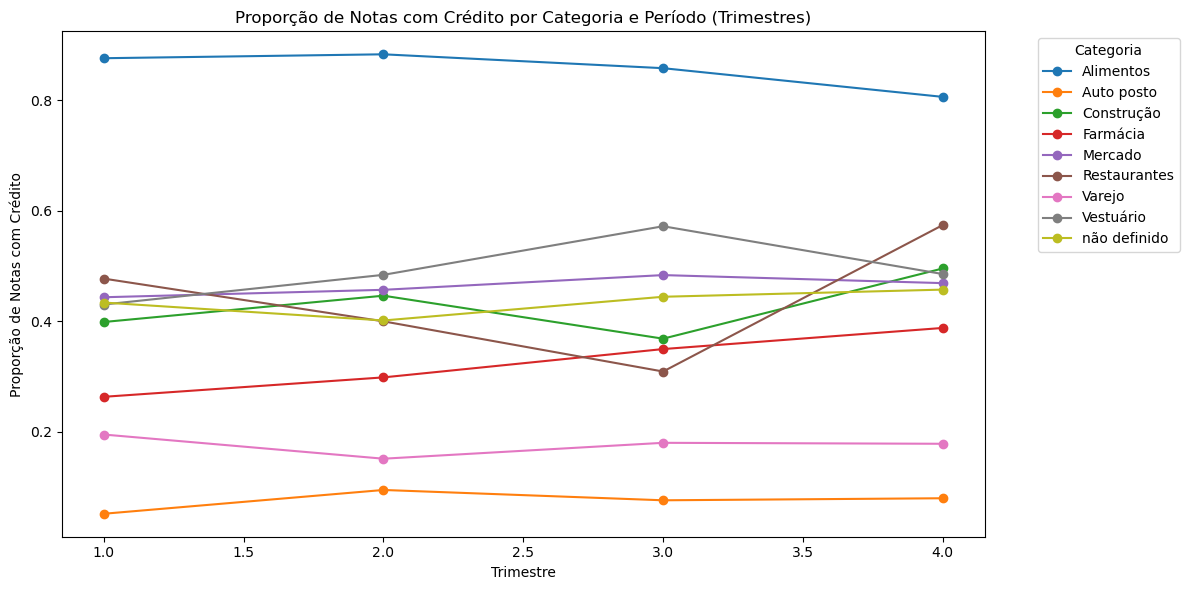

In [61]:
# 1. Quantidade de notas registradas na base por período:
notas_por_periodo = df.groupby('Trimestre').size()

plt.figure(figsize=(12, 6))
notas_por_periodo.plot(kind='line', marker='o', color='blue')
plt.title('Quantidade de Notas Registradas por Período (Trimestres)')
plt.xlabel('Trimestre')
plt.ylabel('Quantidade de Notas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2. Quantidade de notas por categoria e por período:
notas_categoria_periodo = df.groupby(['Trimestre', 'categoria']).size().unstack()

notas_categoria_periodo.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Quantidade de Notas por Categoria e Período (Trimestres)')
plt.xlabel('Trimestre')
plt.ylabel('Quantidade de Notas')
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 3. Proporção de notas com crédito por categoria e período:
# Ajustando índices para evitar conflito de MultiIndex
notas_com_credito = df[df['flag_credito'] == 1].groupby(['Trimestre', 'categoria']).size()
notas_totais = df.groupby(['Trimestre', 'categoria']).size()

# Calculando proporções:
proporcao_credito_categoria_periodo = (notas_com_credito / notas_totais).unstack()

proporcao_credito_categoria_periodo.plot(kind='line', figsize=(12, 6), marker='o')
plt.title('Proporção de Notas com Crédito por Categoria e Período (Trimestres)')
plt.xlabel('Trimestre')
plt.ylabel('Proporção de Notas com Crédito')
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Avalie o WOE e o IV no tempo

Avalie o WOE e o IV no tempo da variável ```categoria```.

## <font color='red'> Conclusões parciais

- **Podemos observar a tabela iv_results_df ordenada, mostrando as variáveis com maior Information Value (IV) no topo, o que ajuda a identificar as variáveis mais importantes para a predição do evento de interesse**.

- **Observamos que as variáveis parecem apresentar maior poder de discriminação segundo o IV são: <font color='blue'> restaurantes, autoposto e mercado<font color='black'>, principalmente, <font color='blue'> restaurantes.**

- **Quando categorizamos variáveis contínuas verificamos a relação entre o número de categorias e o IV.**


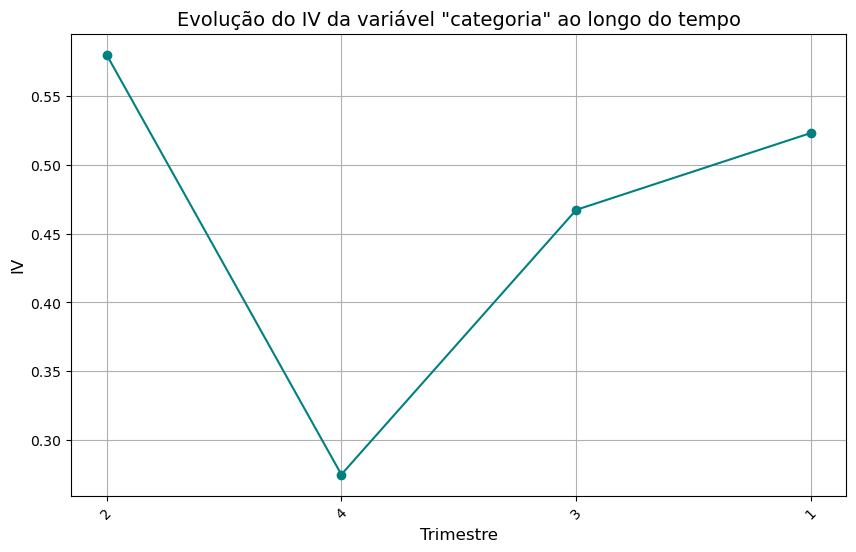

WOE por Trimestre para a variável 'categoria':


,2,4,3,1
Categoria,,,,
Alimentos,2.205132,1.475517,2.139323,2.158795
Auto posto,-2.069111,-2.390698,-2.151565,-2.698626
Construção,-0.030051,0.034375,-0.195749,-0.204790
Farmácia,-0.668575,-0.403674,-0.277360,-0.822264
Mercado,0.012879,-0.071871,0.276872,-0.021076
Restaurantes,-0.220263,0.350457,-0.461349,0.114576
Varejo,-1.537406,-1.474456,-1.172205,-1.210731
Vestuário,0.121622,-0.006022,0.632286,-0.074416
não definido,-0.213767,-0.119096,0.119188,-0.060071


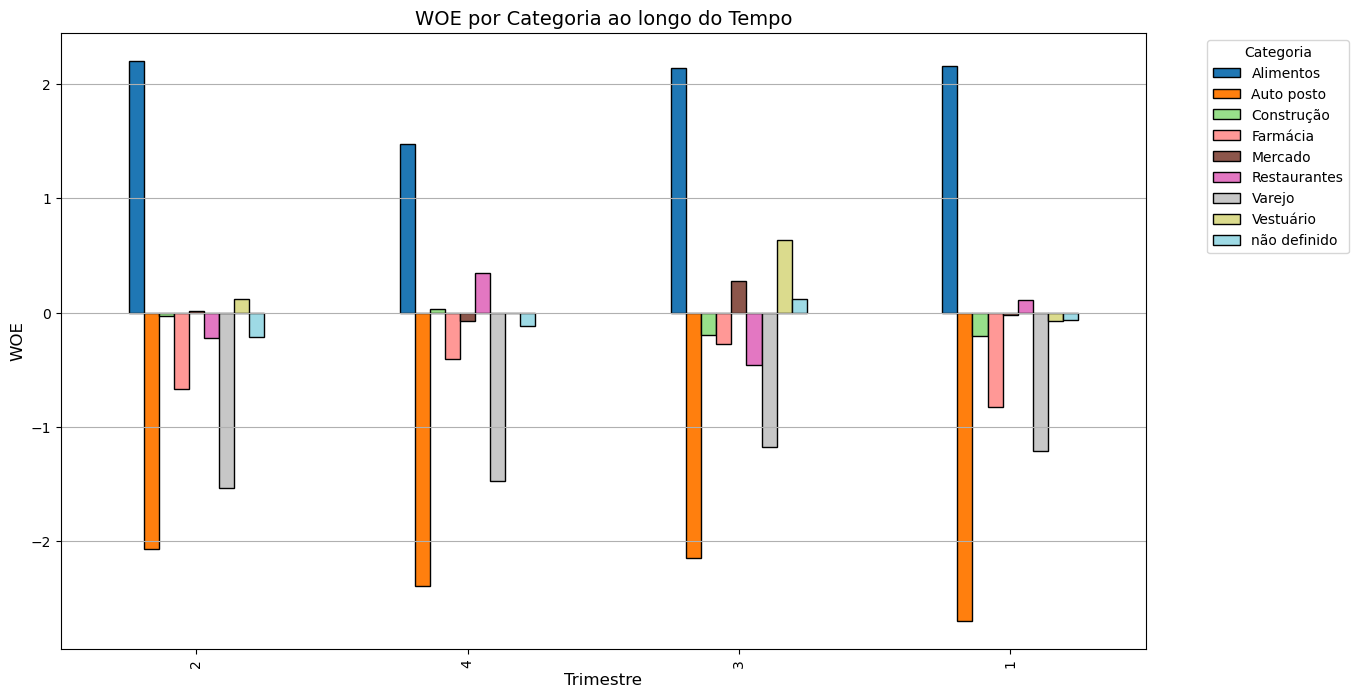

In [63]:
# Desativando os warnings de divide by zero:
warnings.filterwarnings("ignore", category=RuntimeWarning, message="divide by zero encountered in log")

# Função para calcular WOE e IV:
def calc_woe_iv(df, feature, target):
    # Calculando o WOE e o IV conforme descrito anteriormente:
    df_woe = pd.DataFrame()
    df_woe['Total'] = df.groupby(feature)[target].count()
    df_woe['Positivos'] = df.groupby(feature)[target].sum()
    df_woe['Negativos'] = df_woe['Total'] - df_woe['Positivos']
    df_woe['Distribuição Positiva'] = df_woe['Positivos'] / df_woe['Positivos'].sum()
    df_woe['Distribuição Negativa'] = df_woe['Negativos'] / df_woe['Negativos'].sum()
    
    df_woe['WOE'] = np.log(df_woe['Distribuição Positiva'] / df_woe['Distribuição Negativa'])
    df_woe['IV'] = (df_woe['Distribuição Positiva'] - df_woe['Distribuição Negativa']) * df_woe['WOE']
    
    iv = df_woe['IV'].sum()
    woe = df_woe['WOE'].to_dict()  # Retorna os valores de WOE
    
    return {'IV': iv, 'WOE': woe}

# Função para calcular o WOE e IV por trimestre:
def calc_woe_iv_tempo(df, feature, target, time_col):
    woe_iv_tempo = []
    for time_period in df[time_col].unique():
        df_period = df[df[time_col] == time_period]
        woe_iv = calc_woe_iv(df_period, feature, target)  # Utilizando a função calc_woe_iv previamente definida
        if isinstance(woe_iv, dict) and 'IV' in woe_iv:
            woe_iv_tempo.append({'Trimestre': str(time_period), 'IV': woe_iv['IV']})
    return pd.DataFrame(woe_iv_tempo)

# Avaliando o IV no tempo para a variável 'categoria':
iv_categoria_tempo = calc_woe_iv_tempo(df, 'categoria', 'target', 'Trimestre')

# Verificando se a coluna 'Trimestre' está presente:
if 'Trimestre' in iv_categoria_tempo.columns:
    # Plotando o IV ao longo do tempo
    plt.figure(figsize=(10, 6))
    plt.plot(iv_categoria_tempo['Trimestre'], iv_categoria_tempo['IV'], marker='o', color='teal')
    plt.title('Evolução do IV da variável "categoria" ao longo do tempo', fontsize=14)
    plt.xlabel('Trimestre', fontsize=12)
    plt.ylabel('IV', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
else:
    print("A coluna 'Trimestre' não foi encontrada em iv_categoria_tempo.")

# Calculando os WOE por trimestre:
woe_tempo = {}
for time_period in df['Trimestre'].unique():
    df_period = df[df['Trimestre'] == time_period]
    woe_iv = calc_woe_iv(df_period, 'categoria', 'target')
    if isinstance(woe_iv, dict) and 'WOE' in woe_iv:
        woe_tempo[str(time_period)] = woe_iv['WOE']  # Convertendo para string

# Convertendo WOE para DataFrame:
woe_df = pd.DataFrame(woe_tempo)
woe_df.index.name = 'Categoria'

# Exibindo o WOE por trimestre:
print("WOE por Trimestre para a variável 'categoria':")
display(woe_df)

# Plotando o WOE por categoria ao longo do tempo:
woe_df.T.plot(kind='bar', figsize=(14, 8), colormap='tab20', edgecolor='black')
plt.title('WOE por Categoria ao longo do Tempo', fontsize=14)
plt.xlabel('Trimestre', fontsize=12)
plt.ylabel('WOE', fontsize=12)
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.show()


## <font color='red'> Conclusões Finais:


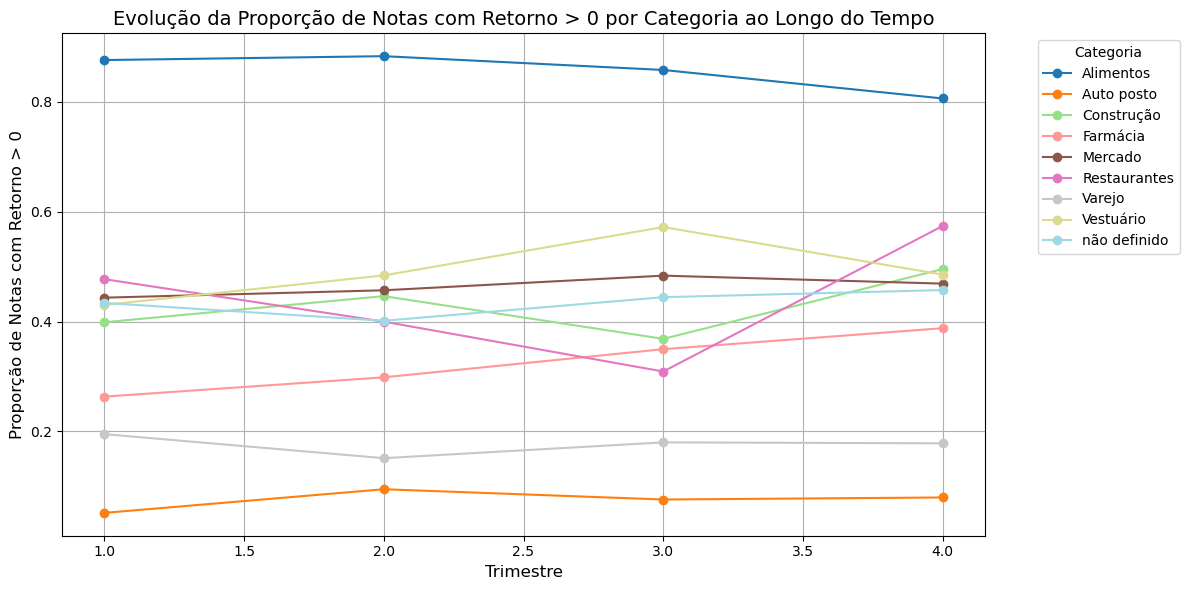

In [69]:
# Calculando a proporção de notas com retorno > 0 por categoria e trimestre:
proporcao_categoria_tempo = df.groupby(['Trimestre', 'categoria'])['Retorno'].apply(lambda x: (x > 0).mean()).unstack()

# Plotando o gráfico com a evolução ao longo do tempo:
proporcao_categoria_tempo.plot(kind='line', figsize=(12, 6), marker='o', cmap='tab20')
plt.title('Evolução da Proporção de Notas com Retorno > 0 por Categoria ao Longo do Tempo', fontsize=14)
plt.xlabel('Trimestre', fontsize=12)
plt.ylabel('Proporção de Notas com Retorno > 0', fontsize=12)
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


categoria
Alimentos       0.860160
Vestuário       0.498062
Mercado         0.463942
não definido    0.436757
Restaurantes    0.430652
Construção      0.428434
Farmácia        0.327041
Varejo          0.175305
Auto posto      0.073462
Name: Retorno, dtype: float64


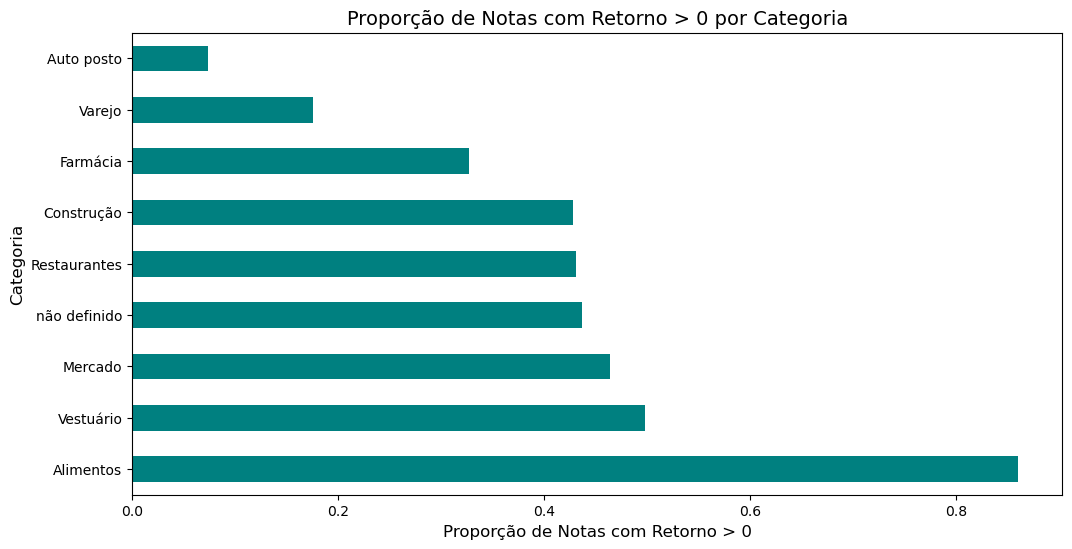

In [71]:
# Calcular a proporção de notas com retorno maior que zero por categoria
proporcao_categoria = df.groupby('categoria')['Retorno'].apply(lambda x: (x > 0).mean()).sort_values(ascending=False)

# Exibir a tabela com a proporção
print(proporcao_categoria)

# Plotar o gráfico de barras
plt.figure(figsize=(12, 6))
proporcao_categoria.plot(kind='barh', color='teal')
plt.title('Proporção de Notas com Retorno > 0 por Categoria', fontsize=14)
plt.xlabel('Proporção de Notas com Retorno > 0', fontsize=12)
plt.ylabel('Categoria', fontsize=12)
plt.show()



- **Verificamos, pelo gráfico de WOE, que algumas categorias, como <font color='blue'>alimentos<font color='black'>, apresentam destaque a princípio, mas ficam similares ao longo do período, apresentando estabilidade ao longo do tempo, como as demais categorias.**
- **Verificamos, nos gráficos acima, as categorias com maior proporção de notas com retornos maiores que zero.**
- **Após as aplicações necessárias para nossa regressão logística, constatamos as categorias <font color='blue'>alimentos, vestuário, mercado e restaurantes<font color='black'> como as mais propensas ao crédito positivo.**
- **Outras categorais também são importantes e aparecem em nosso resultado, reforçando mais uma vez a necessidade de se <font color='red'>incentivar outras atividades comerciais a adotar o projeto #AMABiliDados.**

_______